# Probability Mass Functions

To represent a PMF, we’ll use an object called a Pmf, which contains a set of values and their probabilities. We’ll use Pmf objects to compute the mean and variance of a distribution, and the skewness, which indicates whether it is skewed to the left or right. Finally, we will explore how a phenomenon called the “inspection paradox” can cause a sample to give a biased view of a distribution.


https://allendowney.github.io/ThinkStats/chap03.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from empiricaldist import FreqTab
from empiricaldist import Pmf

In [2]:
ftab = FreqTab.from_seq([1, 2, 2, 3, 5])
ftab

,freqs
1,1
2,2
3,1
5,1


In [3]:
pmf = ftab/ftab.sum()
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


This result indicates that 20% of the values in the sequence are 1, 40% are 2, and so on.

We can also think of these proportions as probabilities in the following sense: 
if we choose a random value from the original sequence, the probability we choose the value 1 is 0.2, the probability we choose the value 2 is 0.4, and so on.

Because we divided through by n, the sum of the probabilities is 1, which means that this distribution is **normalized**.

A normalized FreqTab object represents a probability mass function (PMF), so-called because probabilities associated with discrete values are also called “probability masses”.

In [4]:
pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [5]:
# Lookup
pmf(1)
# OR
pmf[1]

0.2

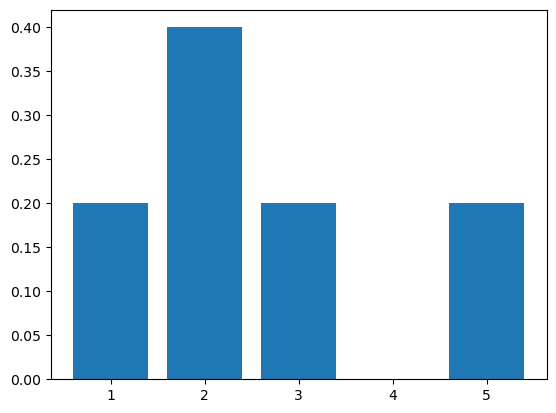

In [6]:
# Bar Chart works as well
pmf.bar()

In [7]:
seq = [1, 2, 2, 3, 5]
pmf = Pmf.from_seq(seq)

In [8]:
pmf.ps

array([0.2, 0.4, 0.2, 0.2])

In [9]:
pmf.qs

array([1, 2, 3, 5], dtype=int64)

In [10]:
# Calc mean
mean = np.sum(pmf.ps * pmf.qs)
# OR
pmf.mean()

2.6

In [11]:
# Calc Variance
deviations = pmf.qs - mean
var = np.sum(pmf.ps * deviations**2)
# OR 
pmf.var()

1.84

In [12]:
# Calc STD
np.sqrt(var)
# OR 
pmf.std()

1.3564659966250536

## Class Size Paradox

As an example of what we can do with Pmf objects, let’s consider a phenomenon I call “the class size paradox.”

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised that many of their classes have more than 10 students, sometimes a lot more. There are two reasons for the discrepancy:

* Students typically take 4 or 5 classes per semester, but professors often teach 1 or 2.

* The number of students in a small class is small, and the number of students in a large class is large.

The first effect is obvious, at least once it is pointed out; the second is more subtle. Let’s look at an example. Suppose that a college offers 65 classes in a given semester, and we are given the number of classes in each of the following size ranges.

In [13]:
ranges = pd.interval_range(start=5, end=50, freq=5, closed="left")
ranges.name = "class size"

data = pd.DataFrame(index=ranges)
data["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2]
data

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [14]:
# Since we don’t know the sizes of the classes in each interval, let’s assume that all sizes are at the midpoint of the range.
sizes = ranges.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [15]:
counts = data["count"]
actual_pmf = Pmf(counts, sizes, name="actual")
actual_pmf.normalize()

65

In [16]:
actual_pmf.mean()

23.692307692307693

In [17]:
def bias(pmf, name):
    # multiply each probability by class size
    ps = pmf.ps * pmf.qs

    # make a new Pmf and normalize it
    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [18]:
# Prob will be different, because of biased counts/probs
observed_pmf = bias(actual_pmf, name="observed")

In [19]:
def two_bar_plots(ftab1, ftab2, label_1="Label 1", label_2="Label 2", width=0.45):
    ftab1.bar(align="edge", width=-width, label=label_1)
    ftab2.bar(align="edge", width=width, alpha=0.5, label=label_2)

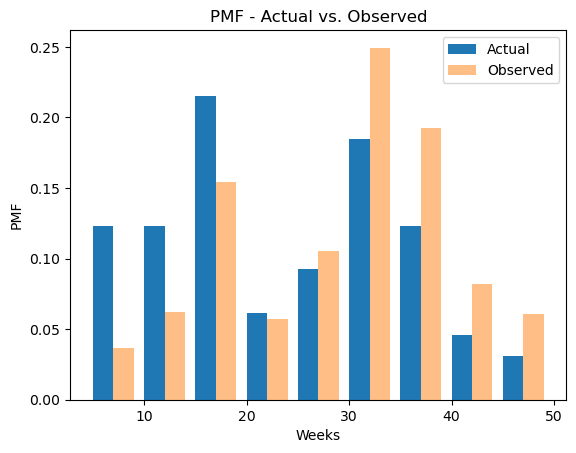

In [20]:
plt.title("PMF - Actual vs. Observed")
two_bar_plots(actual_pmf, observed_pmf, label_1="Actual", label_2="Observed", width=2)

plt.xlabel("Weeks")
plt.ylabel("PMF")
plt.legend()
plt.show()

In [21]:
observed_pmf.mean()

29.123376623376622

In [22]:
def unbias(pmf, name):
    # divide each probability by class size
    ps = pmf.ps / pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [23]:
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf.mean()

23.692307692307693

## NSFG

In the previous chapter, we plotted frequency tables of pregnancy lengths for first babies and others. But the sizes of the groups are not the same, so we can’t compare the frequency tables directly. Because PMFs are **normalized**, we can **compare** them. So let’s load the NSFG data again and make Pmf objects to represent distributions of pregnancy lengths.

In [24]:
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [25]:
first_pmf = Pmf.from_seq(firsts["prglngth"], name="firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name="others")

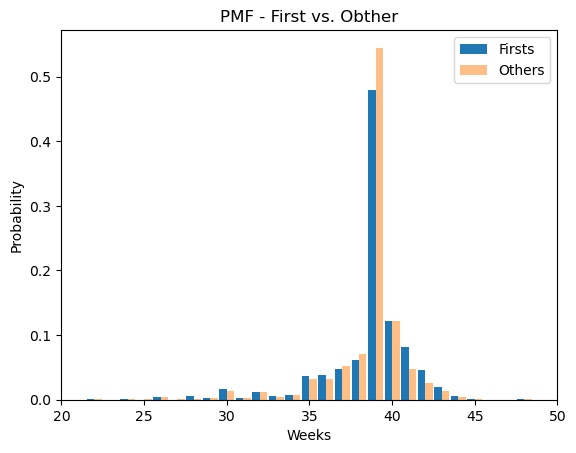

In [ ]:
plt.title("PMF - First vs. Other")
two_bar_plots(first_pmf, other_pmf, label_1="Firsts", label_2="Others")

plt.xlabel("Weeks")
plt.ylabel("Probability")
plt.xlim(20, 50)
plt.legend()
plt.show()

Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) 
and more likely to be late (weeks 41 and 42).

## Other Visualizations

In [35]:
weeks = range(35, 46)
first_pmf(weeks)

array([0.03602991, 0.03897575, 0.04713347, 0.06163608, 0.4790392 ,
       0.12145932, 0.08157716, 0.04645366, 0.01971448, 0.00521187,
       0.00135962])

In [36]:
other_pmf(weeks)

array([0.03210137, 0.03146779, 0.05216473, 0.07074974, 0.54466737,
       0.12249208, 0.04794087, 0.02597677, 0.01288279, 0.00485744,
       0.00084477])

In [38]:
diffs = first_pmf(weeks) - other_pmf(weeks)
diffs

array([ 0.00392854,  0.00750796, -0.00503126, -0.00911366, -0.06562817,
       -0.00103276,  0.03363629,  0.02047689,  0.00683169,  0.00035443,
        0.00051485])

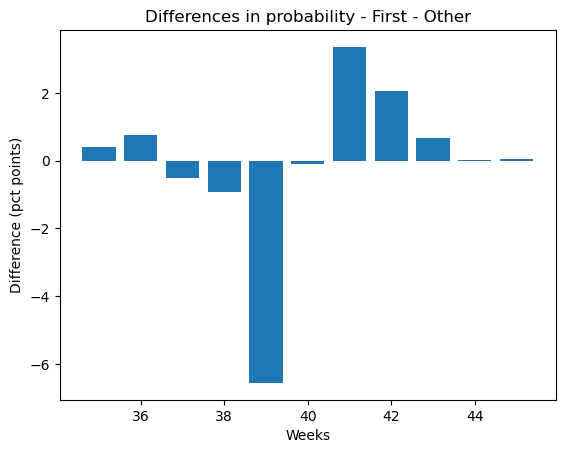

In [42]:
plt.title("Differences in probability - First - Other")
plt.bar(weeks, diffs * 100)
plt.xlabel("Weeks")
plt.ylabel("Difference (pct points)")
plt.show()

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

## Glossary

* normalized: A set of probabilities are normalized if they add up to 1.

* probability mass function (PMF): A function that represents a distribution by mapping each quantity to its probability.

## Exercises

In [52]:
from nsfg import read_fem_resp

resp = read_fem_resp()
resp.shape

(7643, 3092)

### Exercise 3.1

Select the column ```numbabes```, which records the “number of babies born alive” to each respondent. Make a FreqTab object and display the frequencies of the values in this column. Check that they are consistent with the frequencies in the code book. Are there any special values that should be replaced with NaN?

Then make a Pmf object and plot it as a bar graph. Is the distribution symmetric, skewed to the left, or skewed to the right?

In [53]:
ftab = FreqTab.from_seq(resp.numbabes)
ftab

,freqs
numbabes,
0,3229
1,1519
2,1603
3,828
4,309
5,95
6,29
7,15
8,8


In [57]:
# 22 could be possible, but 97 seems a little bit too extreme, replace with NaN

resp.numbabes = resp.numbabes.replace(97, np.nan)

In [58]:
ftab = FreqTab.from_seq(resp.numbabes)
ftab

,freqs
numbabes,
0.0,3229
1.0,1519
2.0,1603
3.0,828
4.0,309
5.0,95
6.0,29
7.0,15
8.0,8


In [59]:
pmf = ftab/ftab.sum()
pmf

,probs
numbabes,
0.0,0.422533
1.0,0.198770
2.0,0.209762
3.0,0.108349
4.0,0.040434
5.0,0.012431
6.0,0.003795
7.0,0.001963
8.0,0.001047


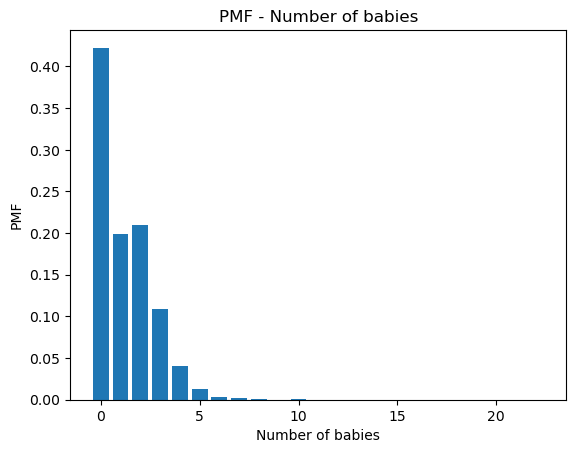

In [63]:
# Right-skewed distribution
plt.title("PMF - Number of babies")
pmf.bar()

plt.xlabel("Number of babies")
plt.ylabel("PMF")
plt.show()

### Exercise 3.2

In the same way that the mean identifies a central point in a distribution, and variance quantifies its spread, there is another statistic, called skewness, that indicates whether a distribution is skewed to the left or right.

Given a sample, we can compute the skewness by computing the sum of the cubed deviations and dividing by the standard deviation cubed. For example, here’s how we compute the skewness of ```numbabes```.


If you are given a Pmf, rather than a sequence of values, you can compute skewness like this:

1. Compute the deviation of each quantity in the Pmf from the mean.

2. Cube the deviations, multiply by the probabilities in the Pmf, and add up the products.

3. Divide the sum by the standard deviation cubed.

Write a function called ```pmf_skewness``` that takes a Pmf object and returns its skewness.

Use your function and the Pmf of numbabes to compute skewness, and confirm you get the same result we computed above.

In [65]:
# Calculate skewness
deviations = resp.numbabes - resp.numbabes.mean()
skewness = np.mean(deviations**3) / resp.numbabes.std(ddof=0) ** 3
skewness

1.7018914266755378

A positive value indicates that a distribution is skewed to the right, and a negative value indicates that it is skewed to the left.

In [66]:
def pmf_skewness(pmf_tab):
    deviations = pmf.qs - pmf.mean()
    return (np.sum((deviations**3) * pmf.ps)) / pmf.std()**3

In [67]:
pmf_skewness(pmf)

1.7018914266755958

### Exercise 3.3

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample at all.

From ```resp```, select ```numkdhh```, which records the number of children under 18 in each respondent’s household. Make a ```Pmf``` of the values in this column.

Use the ```bias``` function to compute the distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [69]:
num_18 = resp.numkdhh

In [73]:
actual_pmf = Pmf.from_seq(num_18)
actual_pmf

,probs
numkdhh,
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


In [74]:
actual_pmf.mean()

1.024205155043831

In [ ]:
# Use the bias function to compute the distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.
# 0 kid, 0 probability
observed_pmf = bias(actual_pmf, name="Biased")
observed_pmf

,probs
0,0.000000
1,0.208993
2,0.383240
3,0.255238
4,0.100153
5,0.052376


In [78]:
observed_pmf.mean()

2.403679100664282

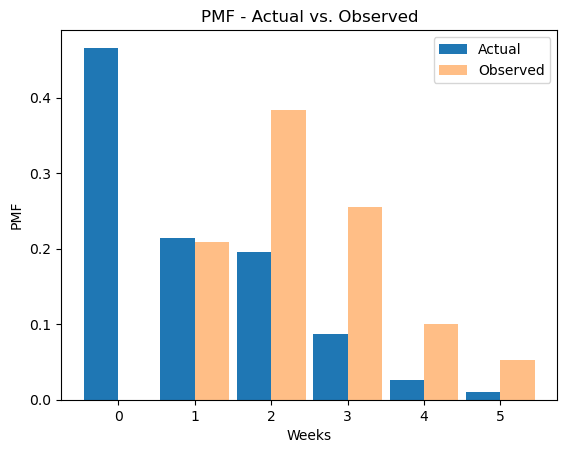

In [81]:
plt.title("PMF - Actual vs. Observed")
two_bar_plots(actual_pmf, observed_pmf, label_1="Actual", label_2="Observed")

plt.xlabel("Weeks")
plt.ylabel("PMF")
plt.legend()
plt.show()